In [6]:
!pip install tensorflow numpy matplotlib scikit-learn seaborn


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [8]:
# Define dataset path
dataset_path = "./minet"  # Folder containing subdirectories of rock types

# Image Data Augmentation & Splitting
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

# Load Training Data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load Validation Data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Print class labels
print("Class Labels:", train_generator.class_indices)


Found 768 images belonging to 7 classes.
Found 189 images belonging to 7 classes.
Class Labels: {'biotite': 0, 'bornite': 1, 'chrysocolla': 2, 'malachite': 3, 'muscovite': 4, 'pyrite': 5, 'quartz': 6}


In [9]:
# Define CNN model
model = Sequential([
    Input(shape=(128, 128, 3)),  # Correct way to define input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # Removed workers & multiprocessing (not needed)
)

# Save the trained model
model.save('rock_cnn_modelinlab6.h5')


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 529ms/step - accuracy: 0.2186 - loss: 2.0167 - val_accuracy: 0.3598 - val_loss: 1.4893
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.3746 - loss: 1.4308 - val_accuracy: 0.5397 - val_loss: 1.2424
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 442ms/step - accuracy: 0.5615 - loss: 1.2067 - val_accuracy: 0.5556 - val_loss: 1.1412
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 466ms/step - accuracy: 0.6182 - loss: 1.0411 - val_accuracy: 0.6508 - val_loss: 0.9406
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 451ms/step - accuracy: 0.6780 - loss: 0.9130 - val_accuracy: 0.7090 - val_loss: 0.8543
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step - accuracy: 0.7654 - loss: 0.6943 - val_accuracy: 0.6349 - val_loss: 0.9623
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 471ms/step - accuracy: 0.7391 - loss: 0.7119 - val_accuracy: 0.6878 - val_loss: 0.8116
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 558ms/step - accuracy: 0.7670 - loss: 0.6266 - val_accu

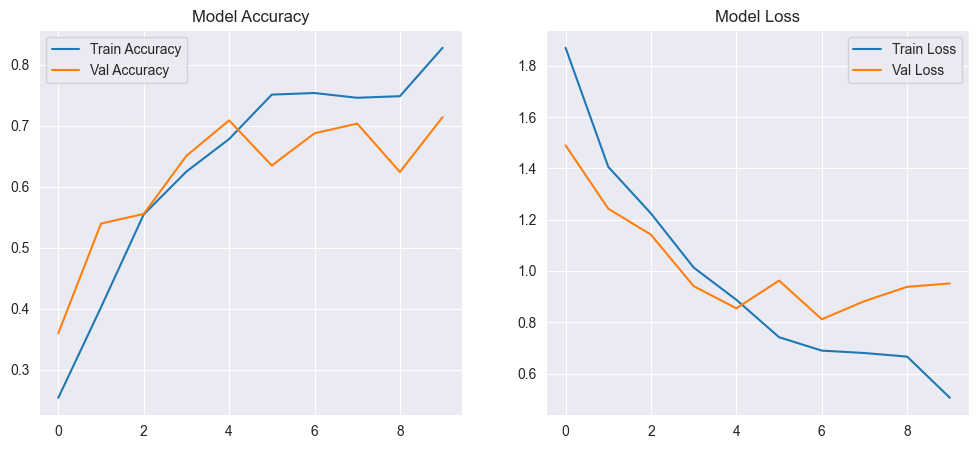

In [11]:
# Plot training history
plt.figure(figsize=(12,5))

# Plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


In [16]:
model_cnn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,545 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# ✅ Provide the path to an image from your dataset
image_path = "./minet/biotite/0066.jpeg"  # Change this to your actual image path

# ✅ Load the image and preprocess it
img = image.load_img(image_path, target_size=(128, 128))  # Ensure this matches your model's input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input shape
img_array /= 255.0  # Normalize (if your model expects it)

# ✅ Initialize the model properly with the actual image
model_cnn(img_array)


<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[9.9999356e-01, 9.6492393e-08, 6.9585058e-09, 6.3246321e-06,
        3.1948009e-08, 2.0094170e-08, 1.5025543e-08]], dtype=float32)>

In [25]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Load your trained model
model_cnn = tf.keras.models.load_model("rock_cnn_modelinlab6.h5")  # Update with actual model path

# Print model summary to verify layer names
model_cnn.summary()

# Choose an intermediate layer for feature extraction
feature_layer_name = "conv2d_8"  # Ensure this layer exists in your model
feature_extractor = Model(inputs=model_cnn.input, outputs=model_cnn.get_layer(feature_layer_name).output)

# Load an image from your dataset
image_path = "./minet/biotite/0066.jpeg"  # Update with actual image path
img = cv2.imread(image_path)
img = cv2.resize(img, (128, 128))  # Resize to match model input size
img = img / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Extract features
features = feature_extractor.predict(img)

# Visualizing the feature maps
fig, axes = plt.subplots(4, 8, figsize=(15, 8))  # Adjust grid based on feature maps
axes = axes.flatten()
for i in range(min(len(axes), features.shape[-1])):  # Loop through feature maps
    axes[i].imshow(features[0, :, :, i], cmap='viridis')
    axes[i].axis('off')

plt.show()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,545 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

AttributeError: The layer sequential_2 has never been called and thus has no defined input.

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Define CNN model
model = Sequential([
    # Convolutional Layers with Batch Normalization and L2 Regularization
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    # Flatten & Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(7, activation='softmax')  # 7 classes (adjust as needed)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,439 (12.61 MB)

 Trainable params: 3,305,991 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation settings
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Load dataset
train_data = datagen.flow_from_directory("./minet", target_size=(128,128), batch_size=32, class_mode='categorical')


Found 957 images belonging to 7 classes.


Found 768 images belonging to 7 classes.
Found 189 images belonging to 7 classes.

Training: Baseline (No Regularization)


C:\Users\parik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.1858 - loss: 2.0029 - val_accuracy: 0.3598 - val_loss: 1.5287
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 947ms/step - accuracy: 0.3988 - loss: 1.4510 - val_accuracy: 0.4444 - val_loss: 1.2930
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 673ms/step - accuracy: 0.5553 - loss: 1.1243 - val_accuracy: 0.5820 - val_loss: 1.0902
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 559ms/step - accuracy: 0.6633 - loss: 0.8969 - val_accuracy: 0.6296 - val_loss: 0.9628
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 590ms/step - accuracy: 0.6818 - loss: 0.8245 - val_accuracy: 0.6878 - val_loss: 0.9073
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 570ms/step - accuracy: 0.7403 - loss: 0.7200 - val_accuracy: 0.6455 - val_loss: 0.9397
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 562ms/step - accuracy: 0.7527 - loss: 0.7229 - val_accuracy: 0.6508 - val_loss: 0.8663
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 922ms/step - accuracy: 0.7301 - loss: 0.7169 - val_accurac

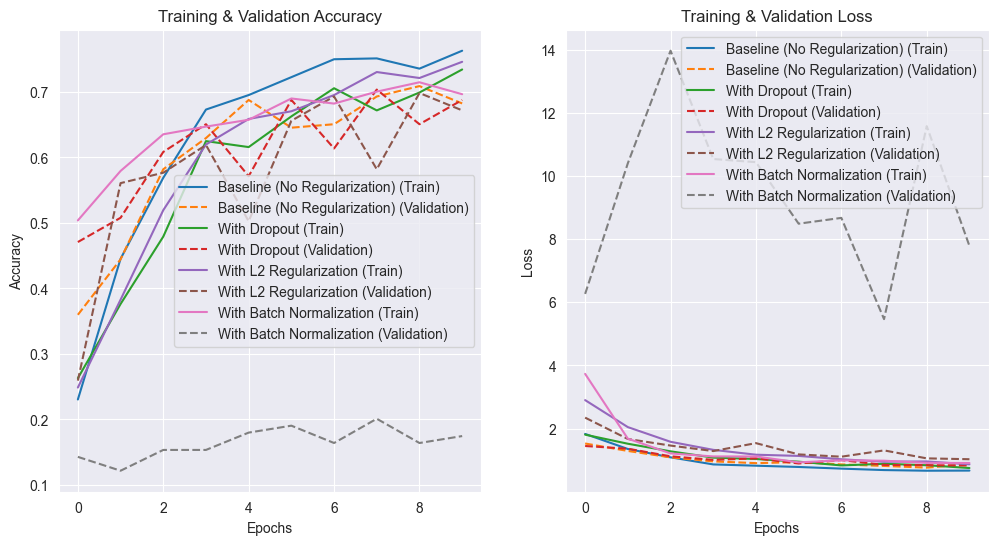

In [29]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Function to create model with different regularization options
def create_model(use_dropout=False, use_l2=False, use_batchnorm=False):
    model = Sequential()

    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3),
                     kernel_regularizer=l2(0.01) if use_l2 else None))
    if use_batchnorm:
        model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.01) if use_l2 else None))
    if use_batchnorm:
        model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.01) if use_l2 else None))
    if use_batchnorm:
        model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    if use_dropout:
        model.add(Dropout(0.5))

    model.add(Dense(7, activation='softmax'))  # Assuming 7 classes

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting for validation
)

# Load dataset
train_data = datagen.flow_from_directory("./minet", target_size=(128,128),
                                         batch_size=32, class_mode='categorical', subset='training')
val_data = datagen.flow_from_directory("./minet", target_size=(128,128),
                                       batch_size=32, class_mode='categorical', subset='validation')

# Training configurations
configs = [
    ("Baseline (No Regularization)", create_model()),
    ("With Dropout", create_model(use_dropout=True)),
    ("With L2 Regularization", create_model(use_l2=True)),
    ("With Batch Normalization", create_model(use_batchnorm=True))
]

# Store results
history_records = {}

# Train each model and store results
for name, model in configs:
    print(f"\nTraining: {name}")
    history = model.fit(train_data, validation_data=val_data, epochs=10, verbose=1)
    history_records[name] = history.history

# Convert results to DataFrame
results = []
for name, history in history_records.items():
    results.append({
        "Model": name,
        "Final Train Accuracy": history['accuracy'][-1],
        "Final Validation Accuracy": history['val_accuracy'][-1],
        "Final Train Loss": history['loss'][-1],
        "Final Validation Loss": history['val_loss'][-1]
    })

df_results = pd.DataFrame(results)

# Print Table
print("\nFinal Comparison Table:")
print(df_results)

# Save table as CSV
df_results.to_csv("regularization_results.csv", index=False)

# Plot Accuracy & Loss Graphs
plt.figure(figsize=(12,6))

# Accuracy Plot
plt.subplot(1,2,1)
for name, history in history_records.items():
    plt.plot(history['accuracy'], label=f"{name} (Train)")
    plt.plot(history['val_accuracy'], linestyle='dashed', label=f"{name} (Validation)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")

# Loss Plot
plt.subplot(1,2,2)
for name, history in history_records.items():
    plt.plot(history['loss'], label=f"{name} (Train)")
    plt.plot(history['val_loss'], linestyle='dashed', label=f"{name} (Validation)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")

plt.show()
